In [1]:
import networkx as nx
import pickle

In [2]:
# raw data
with open('seoul.txt', 'r', encoding = "UTF-8") as file:
    S = file.read().split('\n')

In [3]:
class Edge:
    def __init__(self, u, v, w):
        self.u = u
        self.v = v
        self.w = w

### 1. 역명을 node로 (지하철 네트워크 구조 보존용)

V: 598, E: 1360
V: 598, E: 1360


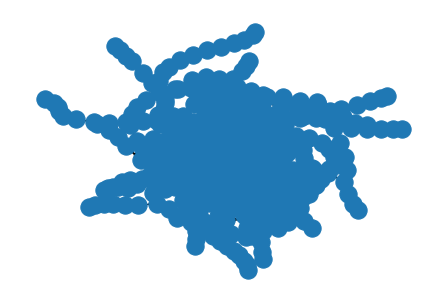

In [4]:
# 역번호 소멸
class Station:
    def __init__(self, stName: str, lineName: str):
        self.stName = stName
        self.lineName = lineName
    def __repr__(self):
        return self.stName
    def __eq__(self, o):
        return self.stName == o.stName
    def __hash__(self):
        return hash(self.stName)

stNo_to_st = {}
stName_to_st = {}

V = []
E = []
with open('seoul.txt', 'r', encoding = "UTF-8") as file:
    S = file.read().split('\n')
L = len(S)
for i in range(L):
    if S[i].strip() == '':
        break
    stNo, stName, lineName = S[i].split()
    st = stName_to_st.get(stName, Station(stName, lineName))
    stNo_to_st[stNo] = st
    stName_to_st[stName] = st

i += 1
for i in range(i, L):
    u, v, w = S[i].split();
    u = stNo_to_st[u]
    v = stNo_to_st[v]
    E.append(Edge(u, v, w))

for stName, st in stName_to_st.items():
    V.append(stName)

G = nx.MultiDiGraph()
G.add_nodes_from(V)
for e in E:
    G.add_edge(e.u.stName, e.v.stName, weight = int(e.w))

print("V: %d, E: %d" % (len(V), len(E)))
print("V: %d, E: %d" % (G.number_of_nodes(), G.number_of_edges()))
nx.draw(G)

In [5]:
print('nodes:',list(G.nodes)[:10])
print('edges:',list(G.edges)[:5])
print('adj:',G.adj['정자'])
# 정자->미금은 두 개의 노선(분당선과 신분당선) 존재

nodes: ['소요산', '동두천', '보산', '동두천중앙', '지행', '덕정', '덕계', '양주', '녹양', '가능']
edges: [('소요산', '동두천', 0), ('동두천', '소요산', 0), ('동두천', '보산', 0), ('보산', '동두천', 0), ('보산', '동두천중앙', 0)]
adj: {'수내': {0: {'weight': 2}}, '미금': {0: {'weight': 3}, 1: {'weight': 3}}, '판교': {0: {'weight': 4}}}


In [6]:
with open('graph_stName_as_node.pkl', 'wb') as f:
    pickle.dump(G, f)

### 2. 역번호를 node로 (최단거리 계산용)


V: 705, E: 1614
V: 705, E: 1614


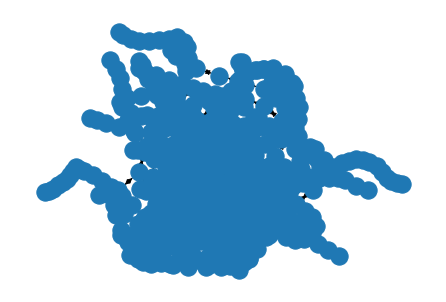

In [7]:
# 역번호를 살리는 쪽. 두 역을 잇는 2개의 방법(두개의 호선)이 존재할 때,
# 역의 고유번호가 다르므로 다른 쌍으로 인식시킬 수 있다. 그래서 Edges수가 감소하지 않은 것을 확인 가능
class Station:
    def __init__(self, stNo: str, stName: str, lineName: str):
        self.stNo = stNo
        self.stName = stName
        self.lineName = lineName
    def __repr__(self):
        return "%s(%s)" % (self.stName, self.stNo)
    def __eq__(self, o):
        return self.stNo == o.stNo
    def __hash__(self):
        return hash(self.stName)

stNo_to_st = {}
stName_to_st = {}

V = []
E = []
L = len(S)
for i in range(L):
    if S[i].strip() == '':
        break
    stNo, stName, lineName = S[i].split()
    st = Station(stNo, stName, lineName)
    V.append(st.stNo) # V
    stNo_to_st[stNo] = st
    stName_to_st[stName] = stName_to_st.get(stName, []) + [st]

i += 1
for i in range(i, L):
    u, v, w = S[i].split();
    u = stNo_to_st[u]
    v = stNo_to_st[v]
    E.append(Edge(u, v, w))

    
for stName, sts in stName_to_st.items():
    for i in sts:
        for j in sts:
            if i == j: continue
            E.append(Edge(i, j, 3))

G = nx.DiGraph()
G.add_nodes_from(V)
for e in E:
    G.add_edge(e.u.stNo, e.v.stNo, weight = int(e.w))

G_invWeight = nx.DiGraph()
G_invWeight.add_nodes_from(V)
for e in E:
    G_invWeight.add_edge(e.u.stNo, e.v.stNo, weight = 1 / int(e.w))

print("V: %d, E: %d" % (len(V), len(E)))
print("V: %d, E: %d" % (G.number_of_nodes(), G.number_of_edges()))
nx.draw(G)

In [8]:
print('nodes:',list(G.nodes)[:10])
print('edges:',list(G.edges)[:5])
print('adj:',G.adj['D12'])
#(D12 - 정자(신분당선), K230 - 정자(분당선), D11 - 판교, D13 - 미금)

nodes: ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109']
edges: [('100', '101'), ('101', '100'), ('101', '102'), ('102', '101'), ('102', '103')]
adj: {'D11': {'weight': 4}, 'D13': {'weight': 3}, 'K230': {'weight': 3}}


In [10]:
print('nodes:',list(G_invWeight.nodes)[:10])
print('edges:',list(G_invWeight.edges)[:5])
print('adj:',G_invWeight.adj['D12'])
#(D12 - 정자(신분당선), K230 - 정자(분당선), D11 - 판교, D13 - 미금)

nodes: ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109']
edges: [('100', '101'), ('101', '100'), ('101', '102'), ('102', '101'), ('102', '103')]
adj: {'D11': {'weight': 0.25}, 'D13': {'weight': 0.3333333333333333}, 'K230': {'weight': 0.3333333333333333}}


In [11]:
with open('graph_stNo_as_node.pkl', 'wb') as f:
    pickle.dump(G, f)
with open('graph_stNo_as_node_invWeight.pkl', 'wb') as f:
    pickle.dump(G_invWeight, f)